In [6]:
import IPython
import os
os.system("ls [a-z]*.md | grep -Ev 'audris|bklein' | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files
len(files)

['afranz1', 'afriend3', 'agreer26', 'alay10', 'amistry2', 'andlrutt', 'asharm42', 'ayu5', 'azeng2', 'bhaynie', 'bmarth', 'bnd674', 'cfishe36', 'cgraha37', 'cheadri6', 'cshubert', 'dwoun', 'ebriggs4', 'echavez2', 'ely1', 'evaugha3', 'fhill5', 'gbb823', 'gjur1', 'hcurl', 'hdehler', 'hli102', 'hnguye48', 'ipelton', 'jarmiger', 'jblackab', 'jbower31', 'jbrouss2', 'jchen125', 'jhalloy', 'jhawki41', 'jhulen', 'jkim172', 'jking148', 'jmcelr10', 'jmckni13', 'jrich19', 'jshoffn3', 'jskeen6', 'jskupien', 'jsteed', 'jyoshiok', 'kchrist', 'kcraddoc', 'knuchol1', 'kpatel68', 'lbower10', 'lliu58', 'loneal7', 'mpatel65', 'mpuryea2', 'mstott3', 'mtiwari', 'mwang43', 'naskew', 'nshoap', 'oselyuti', 'pgajjala', 'rcarnes', 'rgarg4', 'rlau', 'rrosenb4', 'san5', 'shuang24', 'sjeroute', 'skerzel', 'slaughl2', 'smalluri', 'smistry1', 'sshiran1', 'tpanumat', 'ttahmid', 'tvillarr', 'vpk542', 'wcuny', 'wfortner', 'wouyang2', 'wquesinb', 'xzl263', 'zmille10', 'zperry4']


86

In [7]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  line = a.read()
  documents .append(line)
  text = text + " " + line
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [8]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,afranz1,afriend3,agreer26,alay10,amistry2,andlrutt,asharm42,ayu5,azeng2,bhaynie,...,ttahmid,tvillarr,vpk542,wcuny,wfortner,wouyang2,wquesinb,xzl263,zmille10,zperry4
afranz1,1.000,0.088,0.110,0.087,0.247,0.042,0.032,0.070,0.087,0.096,...,0.032,0.010,0.111,0.051,0.102,0.082,0.069,0.117,0.055,0.056
afriend3,0.088,1.000,0.150,0.101,0.102,0.141,0.079,0.123,0.176,0.102,...,0.068,0.068,0.155,0.128,0.110,0.123,0.116,0.160,0.073,0.126
agreer26,0.110,0.150,1.000,0.141,0.170,0.106,0.029,0.206,0.184,0.189,...,0.132,0.085,0.225,0.160,0.148,0.211,0.111,0.170,0.156,0.082
alay10,0.087,0.101,0.141,1.000,0.115,0.130,0.055,0.139,0.116,0.146,...,0.082,0.029,0.115,0.116,0.142,0.192,0.089,0.114,0.062,0.135
amistry2,0.247,0.102,0.170,0.115,1.000,0.097,0.070,0.173,0.149,0.090,...,0.096,0.023,0.076,0.156,0.091,0.141,0.097,0.085,0.101,0.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wouyang2,0.082,0.123,0.211,0.192,0.141,0.079,0.051,0.183,0.157,0.144,...,0.100,0.072,0.179,0.121,0.104,1.000,0.128,0.189,0.059,0.153
wquesinb,0.069,0.116,0.111,0.089,0.097,0.045,0.051,0.193,0.173,0.086,...,0.052,0.057,0.159,0.057,0.066,0.128,1.000,0.082,0.086,0.078
xzl263,0.117,0.160,0.170,0.114,0.085,0.117,0.057,0.115,0.107,0.175,...,0.092,0.068,0.145,0.143,0.117,0.189,0.082,1.000,0.100,0.103
zmille10,0.055,0.073,0.156,0.062,0.101,0.092,0.063,0.068,0.061,0.072,...,0.036,0.037,0.148,0.079,0.096,0.059,0.086,0.100,1.000,0.116


0.645556764128187
tvillarr vpk542 jhawki41 rcarnes jsteed kpatel68 
rrosenb4 xzl263 bhaynie mpuryea2 mtiwari 
tpanumat gbb823 ebriggs4 sjeroute ttahmid lliu58 
mwang43 ipelton smalluri hdehler wcuny 
jskeen6 asharm42 san5 andlrutt cgraha37 
jskupien slaughl2 jblackab wfortner jhulen 
jbower31 pgajjala jmcelr10 fhill5 jchen125 oselyuti 
bmarth loneal7 smistry1 afriend3 jking148 
hcurl kchrist gjur1 kcraddoc echavez2 nshoap 
afranz1 cheadri6 jbrouss2 shuang24 hnguye48 
bnd674 lbower10 zperry4 jhalloy jrich19 
cfishe36 mpatel65 naskew skerzel zmille10 dwoun 
jyoshiok wouyang2 cshubert evaugha3 ayu5 mstott3 
alay10 jarmiger azeng2 rlau agreer26 
rgarg4 ely1 amistry2 jkim172 hli102 
wquesinb jmckni13 jshoffn3 knuchol1 sshiran1 


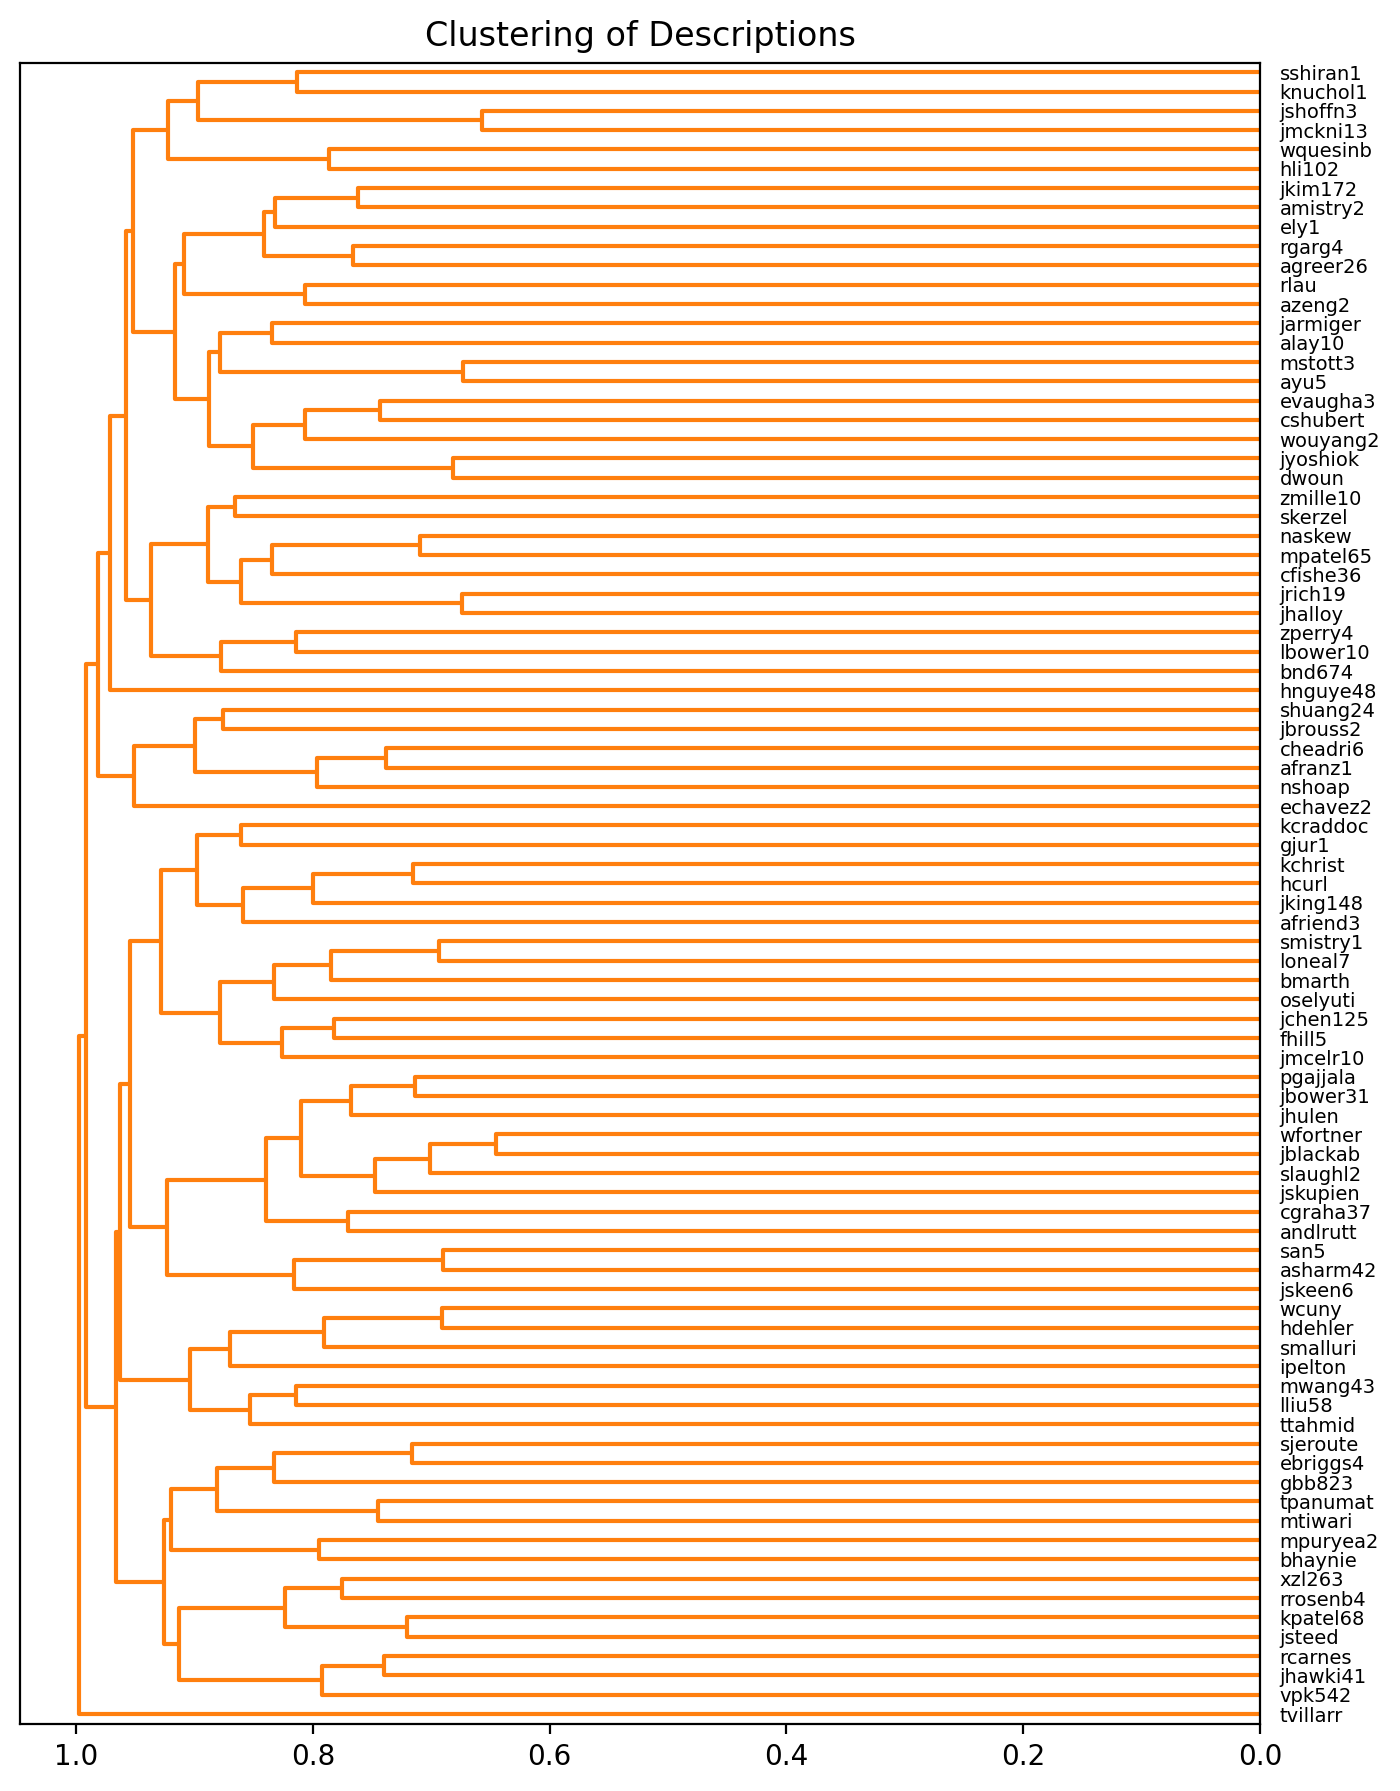

In [15]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math, sys
import matplotlib.pyplot as plt
import numpy as np
import re
import random

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)   
#dist ij = dist2 [i*(n-1)+j] and i < j
dist1 = pdist(tfidf.A, 'cosine')
minVal = min(dist1)
print(minVal)
d1 = len(files)-1
ij = np.where(dist1==minVal)[0][0]
for i in range(0,d1):
    for j in range (i+1,d1):
        ij -= 1
        if ij == 0: 
            break
    else:        
        continue  
    break



# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)

# Plot results
fig = plt.figure(1, figsize=(8, 11),dpi=200)
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,leaf_font_size =7
               )
j = 0
while j < 86:
  for i in range (1,random.randint(6,7)):
    sys.stdout.write(flab[ddata['leaves'][j]]+' ')
    j+=1
  sys.stdout.write('\n')

plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")

# Investigate interactive graph

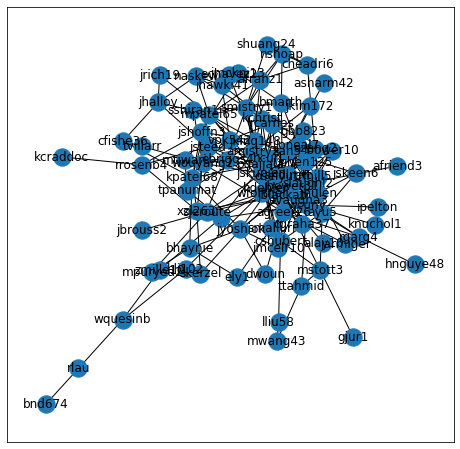

In [17]:

import networkx as nx
import json
import matplotlib.pyplot as plt
%matplotlib inline


# use these distances to create a graph by cutting links below .2 
lbl = {}
nxg = nx.Graph()
for i in range(len(files)-1):
    nxg.add_node(i, label=flab[i])
    lbl[i]=flab[i]
for i in range(len(files)-1):    
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):        
        if df.iloc[i,j] > maxVal: 
            maxVal = df.iloc[i,j]
            if i != j: jMax = j
        if (df.iloc[i,j] > .2):
            nLinks += 1
            nxg.add_edge(i, j, weight=math.sqrt(df.iloc[i,j]*150+1),color='yellow')
    if nLinks == 0:
        nxg.add_edge(i, jMax, weight=10,color='red')
        
#print (nxg.nodes())

fig, ax = plt.subplots(1, 1, figsize=(8, 8));
nx.draw_networkx(nxg, ax=ax, labels=lbl )


nodes = [{'name': nxg.nodes()[i]  } for i in nxg.nodes() ]
links = [{'source': u[0], 'target': u[1]} for u in nxg.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)





In [18]:
%%html
<div id="d3-students"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [19]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 300, height = 300;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-50)
    .linkDistance(20)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-students").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-students").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.name);
      })
      .call(force.drag);

    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name['label']; });


    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});

<IPython.core.display.Javascript object>